In [1]:
import requests
import csv
import os
from datetime import datetime
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random
from citipy import citipy
from api_keys import weather_api_key
from pprint import pprint
from scipy.stats import linregress
import matplotlib.patches as mpl_patches

In [2]:
lat = []
lng = []
nearest_city =[]
nearest_ctry =[]
temp_day = []
temp_night = []
temp_max = []
humidity = []
wind = []
clouds = []
time = []
data_dict = []

num_cities = 50

for x in range(num_cities):
    lat_rnd = random.uniform(-90,90)
    lng_rnd = random.uniform(-180,180)
    city = citipy.nearest_city(lat_rnd, lng_rnd)
    city_rnd = city.city_name
    ctry_rnd = city.country_code
    
    url = "http://api.openweathermap.org/data/2.5/onecall?lat=" + str(lat_rnd) + "&lon=" + str(lng_rnd) + "&exclude=hourly,current,minutely,alerts&units=imperial&appid=a7a1f8581953b7105f0c5ef795920a44"
    
    data = requests.get(url).json()
    
    lat.append(lat_rnd)
    lng.append(lng_rnd)
    nearest_city.append(city_rnd)
    nearest_ctry.append(ctry_rnd)
    data_dict.append(data)

    hemisphere = [0 for x in range(num_cities)]

for x in range(num_cities):

    temp_day.append(data_dict[x]['daily'][0]['temp']['day'])
    temp_night.append(data_dict[x]['daily'][0]['temp']['night'])
    temp_max.append(data_dict[x]['daily'][0]['temp']['max'])
    humidity.append(data_dict[x]['daily'][0]['humidity'])
    clouds.append(data_dict[x]['daily'][0]['clouds'])
    wind.append(data_dict[x]['daily'][0]['wind_speed'])
    time_utc = int(data_dict[x]['daily'][0]['dt'])
    time.append(datetime.utcfromtimestamp(time_utc).strftime('%Y-%m-%d'))

In [3]:

weather_df = pd.DataFrame(
    {'City': nearest_city,
     'Country':nearest_ctry,
     'Longitude': lng,
     'Latitude': lat,
     'Temperature Max (F)': temp_max,
     'Humidity (%)': humidity,
     'Cloudiness': clouds,
     'Wind Speed (mph)': wind,
     'Hemisphere': hemisphere
    })
weather_df.tail()

,City,Country,Longitude,Latitude,Temperature Max (F),Humidity (%),Cloudiness,Wind Speed (mph),Hemisphere
495,cidreira,br,-23.964315,-55.079029,33.93,95,100,27.07,Southern
496,dalbandin,pk,64.566122,28.581058,64.90,27,0,0.58,Northern
497,bandarbeyla,so,60.207083,7.924512,80.10,82,83,18.61,Northern
498,hermanus,za,12.767059,-67.296577,31.08,98,97,12.24,Southern
499,ust-kulom,ru,53.382248,61.090272,19.40,96,100,3.02,Northern


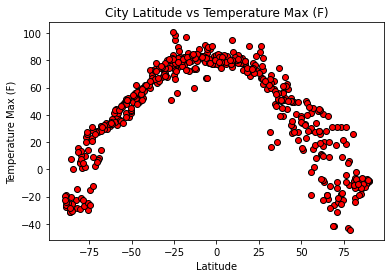

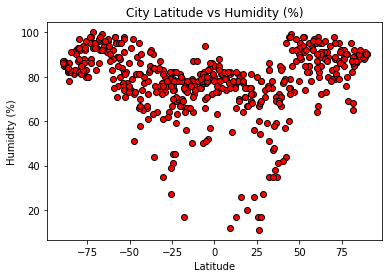

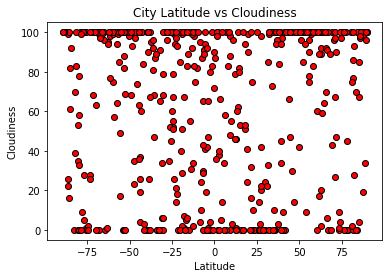

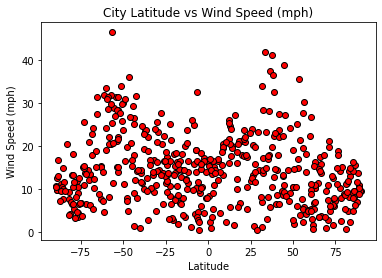

In [4]:
for x in range(4):
    x_values = weather_df['Latitude']
    y_values = weather_df.iloc[:,(x+4)]
    plt.scatter(x_values,y_values, marker='o', facecolors="red", edgecolors = 'black')
    plt.xlabel('Latitude')
    plt.ylabel(weather_df.columns[x+4])
    plt.title('City Latitude vs ' + weather_df.columns[x+4])
    plt.savefig("./figures/" + weather_df.columns[x+4] + "_all_data.png")
    plt.show()
    plt.close()

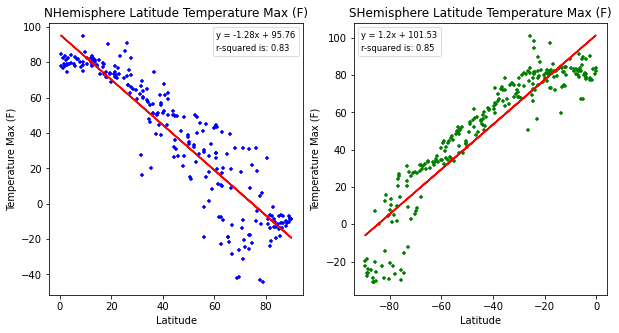

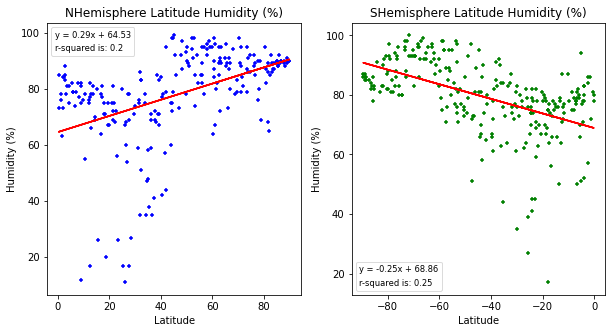

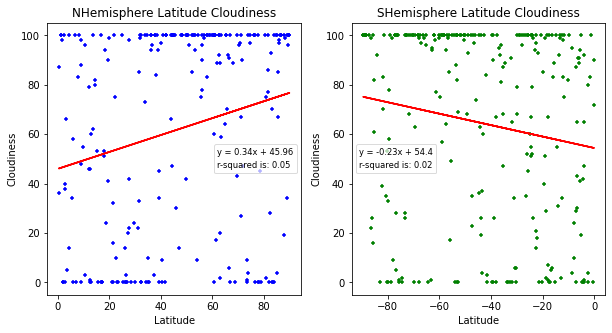

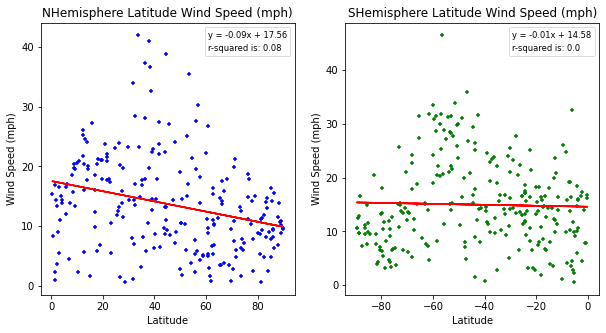

In [5]:

    filtN = weather_df['Hemisphere']=='Northern'
    filtS = weather_df['Hemisphere']=='Southern'
    
    weather_nh_df= weather_df.loc[filtN]
    weather_sh_df= weather_df.loc[filtS]
      
for x in range(4):
    
        fig, ax = plt.subplots(1,2, figsize=(10,5))
        x_values_n = weather_nh_df['Latitude']
        x_values_s = weather_sh_df['Latitude']

        y_values_n = weather_nh_df.iloc[:,(x+4)]
        y_values_s = weather_sh_df.iloc[:,(x+4)]

        ax[0].scatter(x_values_n, y_values_n, s=10, c='b', marker='+')
        ax[0].set_xlabel('Latitude')
        ax[0].set_ylabel(weather_df.columns[x+4])
        ax[0].set_title('NHemisphere Latitude ' + weather_df.columns[x+4])
        
        (slope_n, intercept_n, rvalue_n, pvalue, stderr) = linregress(x_values_n, y_values_n)
        regress_values_n = x_values_n * slope_n + intercept_n
        ax[0].plot(x_values_n,regress_values_n,"r-")
        line_eq_n = "y = " + str(round(slope_n,2)) + "x + " + str(round(intercept_n,2))
        message_n = f'r-squared is: {round(rvalue_n**2,2)}'
        
        labels_n = [line_eq_n, message_n]
        
        ax[0].plot(x_values_n,regress_values_n,"r-")
        handles_n = [mpl_patches.Rectangle((0, 0), 1, 1, fc="white", ec="white", 
                                 lw=0, alpha=0)] * 2

        ax[0].legend(handles_n, labels_n, loc='best', fontsize='small', 
          fancybox=True, framealpha=0.7, 
          handlelength=0, handletextpad=0)

        ax[1].scatter(x_values_s,  y_values_s, s=10, c='g', marker='+')
        ax[1].set_xlabel('Latitude')
        ax[1].set_ylabel(weather_df.columns[x+4])
        ax[1].set_title('SHemisphere Latitude ' + weather_df.columns[x+4])   
        
        (slope_s, intercept_s, rvalue_s, pvalue, stderr) = linregress(x_values_s, y_values_s)
        regress_values_s = x_values_s * slope_s + intercept_s
        ax[1].plot(x_values_s,regress_values_s,"r-")
        
        line_eq_s = "y = " + str(round(slope_s,2)) + "x + " + str(round(intercept_s,2))
        message_s = f'r-squared is: {round(rvalue_s**2,2)}'
        
        labels_s = [line_eq_s, message_s]
        
        ax[1].plot(x_values_s,regress_values_s,"r-")
        handles_s = [mpl_patches.Rectangle((0, 0), 1, 1, fc="white", ec="white", 
                                 lw=0, alpha=0)] * 2

        ax[1].legend(handles_s, labels_s, loc='best', fontsize='small', 
          fancybox=True, framealpha=0.7, 
          handlelength=0, handletextpad=0)
        
        plt.savefig("./figures/" + weather_df.columns[x+4] + "_byHemisphere.png")
        plt.show()
        plt.close()